In [25]:
import pickle
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

import sys

In [164]:
cm = 1/2.54
dpi = 150

plt.rcParams['figure.dpi'] = dpi
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['ytick.labelsize'] = 7
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['axes.labelsize'] = 9
plt.rcParams["axes.edgecolor"] = ".15"
plt.rcParams["axes.linewidth"]  = 0.5
sns.set_style("white")

### Import Data

In [2]:
# dataset = 'train'
dataset = 'train'
test = False

In [3]:
ern_data_df = pd.read_pickle(f"../data/models_pickles_new_dass/ern_models_{dataset}.pkl")
ern_cov_fal_data_df = pd.read_pickle(f"../data/models_pickles_new_dass/ern_cov_fal_models_{dataset}.pkl")
# ern_cov_peak_data_df = pd.read_pickle(f'data/models_pickles_new/ern_cov_peak_models_{dataset}.pkl')

crn_data_df = pd.read_pickle(f"../data/models_pickles_new_dass/crn_models_{dataset}.pkl")
crn_cov_fal2_data_df = pd.read_pickle(f"../data/models_pickles_new_dass/crn_cov_fal2_models_{dataset}.pkl")
# crn_cov_fal6_data_df = pd.read_pickle(f"data/models_pickles_new/crn_cov_fal6_models_{dataset}.pkl")
# crn_cov_peak_data_df = pd.read_pickle(f'data/models_pickles_new/crn_cov_peak_models_{dataset}.pkl')

In [4]:
ern_data_df.shape

(260, 32)

In [5]:
datasets = [
    # ern_data_df, 
    ern_cov_fal_data_df, 
    # ern_cov_peak_data_df,
    # crn_data_df,
    crn_cov_fal2_data_df,
    # crn_cov_fal6_data_df,
    # crn_cov_peak_data_df,
]

## Test relationships that dissapeared after covariates adjustment

- ERN
    - reward - gender - ERN
    - thought supression - gender - ERN
    - high standards : OB/perf - gender - ERN 

In [165]:
ern_cov_fal_data_df.head()

,e_ERN,e_LT_F,Age,Sex,Handness,RRQ,DASS-21 Stress,DASS-21 Dep,STAI-T,STAI-S Diff,...,T-CTR,OB_PERF,PS,AMB,PRED,STAND,IUS-P,IUS-I,SES,performance
0,-6.622882e-07,0.082812,0.424951,1.0,1.0,3.416667,1.285714,2.142857,2.25,10.298817,...,4.0,4.0,1.428571,4.83,4.25,4.666667,3.142857,2.8,2.4,1.684569
1,-1.121127e-05,0.106250,0.424985,1.0,1.0,3.750000,1.142857,1.285714,2.00,8.185239,...,1.6,2.6,2.714286,4.17,3.75,5.000000,2.714286,1.8,3.1,1.376404
2,-1.579851e-05,0.063281,0.425040,1.0,1.0,3.833333,1.857143,1.571429,2.40,14.306246,...,1.8,3.2,3.285714,4.00,4.25,4.333333,2.142857,3.0,2.4,-0.098470
3,-5.217479e-07,0.004687,0.425113,1.0,1.0,2.250000,3.000000,2.571429,2.80,8.185239,...,1.2,2.0,3.428571,3.33,3.00,4.000000,3.428571,3.2,2.7,1.239223
4,-6.456946e-06,0.059375,0.425062,1.0,1.0,3.916667,2.142857,1.571429,2.25,8.915005,...,2.0,1.8,2.285714,3.67,3.25,4.000000,2.857143,1.8,3.0,-0.746350


In [166]:
ern_cov_fal_data_df.shape

(260, 37)

In [167]:
df = ern_cov_fal_data_df[ern_cov_fal_data_df['Sex'].isin([0,1])]

In [168]:
df.shape

(260, 37)

In [250]:
columns = df.columns.to_list()
asterixes = []

for column in columns:
    if column == 'Sex':
        pass
    else:
        female_set = df[df['Sex'] == 0][column].to_numpy()
        male_set = df[df['Sex'] == 1][column].to_numpy()

        t, p = scipy.stats.ttest_ind(female_set, male_set)

        asterix = '*' if p <= 0.05 else ''
        asterixes.append(asterix)
        print(f"{column} {asterix}")

        print(f"   Female M = {np.mean(female_set)} (SD = {np.std(female_set)})")
        print(f"   Male M = {np.mean(male_set)} (SD = {np.std(male_set)})")

        print(f"Diff: t = {t}, p = {p}\n")

e_ERN 
   Female M = -4.2422944412882645e-06 (SD = 4.659966200455301e-06)
   Male M = -3.364011896760188e-06 (SD = 4.199184604304367e-06)
Diff: t = -1.5637411853849605, p = 0.11910408482809448

e_LT_F *
   Female M = 0.04287901182432433 (SD = 0.027191832396055646)
   Male M = 0.05062081473214285 (SD = 0.026386533575846402)
Diff: t = -2.2935500765473984, p = 0.02262072807168713

Age *
   Female M = 0.4249839906313878 (SD = 8.600568894140046e-05)
   Male M = 0.42501009939064155 (SD = 9.434138134263914e-05)
Diff: t = -2.3153221071772214, p = 0.021380239073358336

Handness 
   Female M = 0.9324324324324325 (SD = 0.25100237325684743)
   Male M = 0.8660714285714286 (SD = 0.340575555763583)
Diff: t = 1.8016635757411048, p = 0.07276572194481729

RRQ 
   Female M = 3.630405405385135 (SD = 0.8743309673391939)
   Male M = 3.5261607143125 (SD = 0.8112272949863228)
Diff: t = 0.978083345731959, p = 0.3289493255837047

DASS-21 Stress *
   Female M = 2.3581756756756755 (SD = 0.676893736266687)
   Male

In [251]:
# Create an empty list to store the transformed data
transformed_data = []

# Iterate through each row of the original DataFrame
for index, row in df.iterrows():
    # Iterate through each column (questionnaire scale)
    for scale_name, score in row.items():
        if scale_name == 'Sex':
            pass
        else:
            # Append a dictionary containing score and scale name to the transformed data list
            transformed_data.append({'score': score, 'scale': scale_name, 'gender': row['Sex']})

# Create a new DataFrame from the transformed data list
transformed_df = pd.DataFrame(transformed_data)

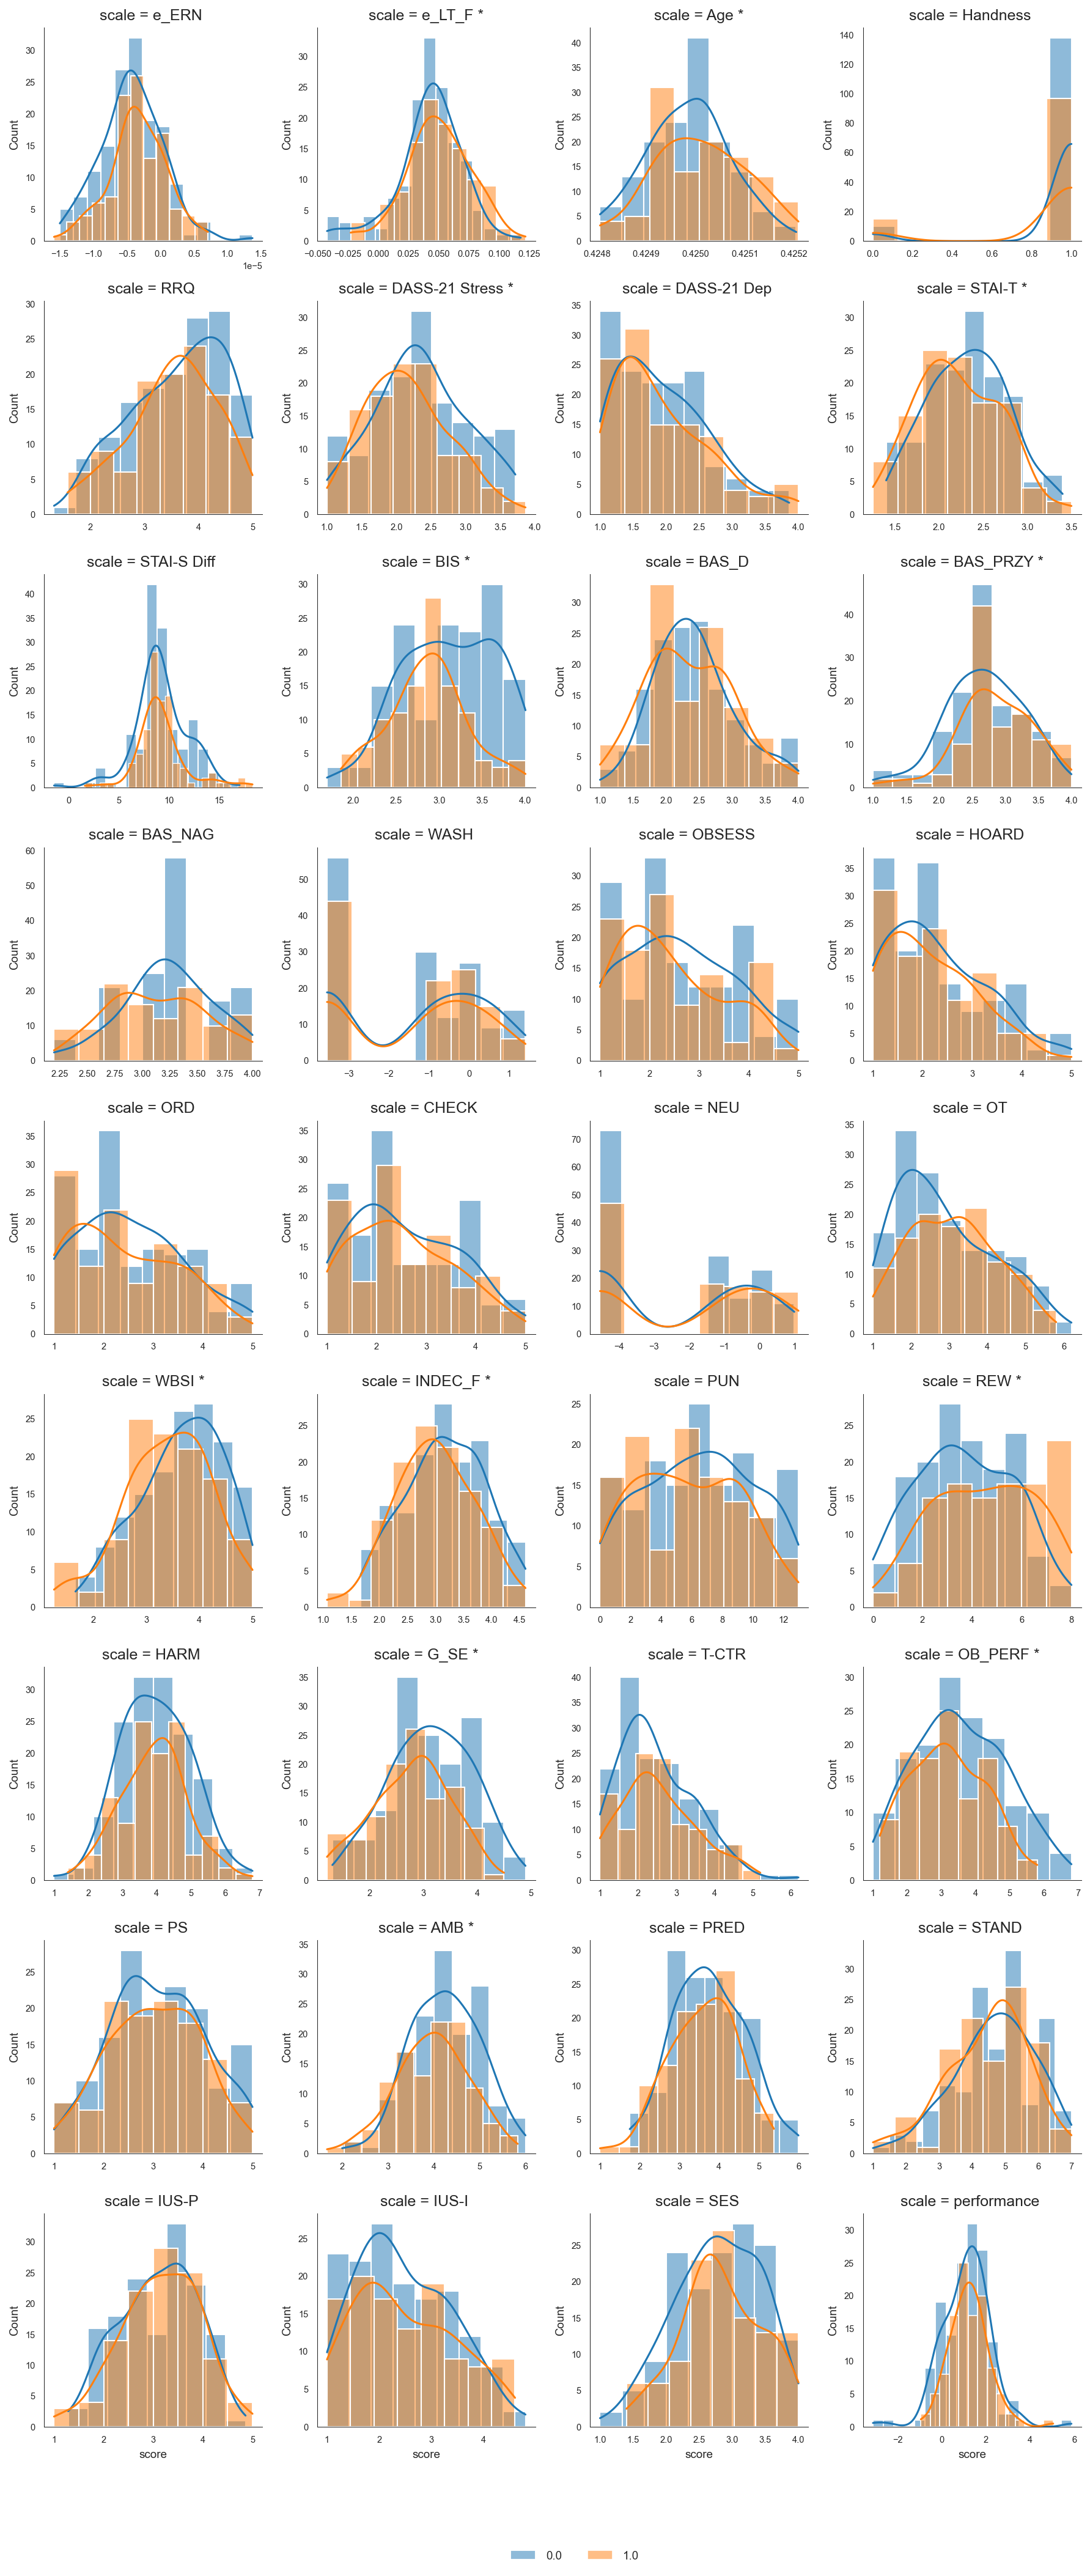

In [252]:
g = sns.FacetGrid(
    transformed_df, 
    col='scale',
    col_wrap=4,
    sharex=False,
    sharey=False,
    hue='gender'
)

g.map_dataframe(
    sns.histplot, 
    x="score",
    kde=True,
    # cbar_kws={'saturation':0.9}
)

g.add_legend()

sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, -0.04), ncol=2, title=None, frameon=False,
)
plt.setp(g._legend.get_texts(), fontsize=9)

for index, ax in enumerate(g.axes):
    title = f"{ax.get_title()} {asterixes[index]}"
    ax.set_title(title)
                        
plt.show()

- reward

Male = 1 || Female = 0

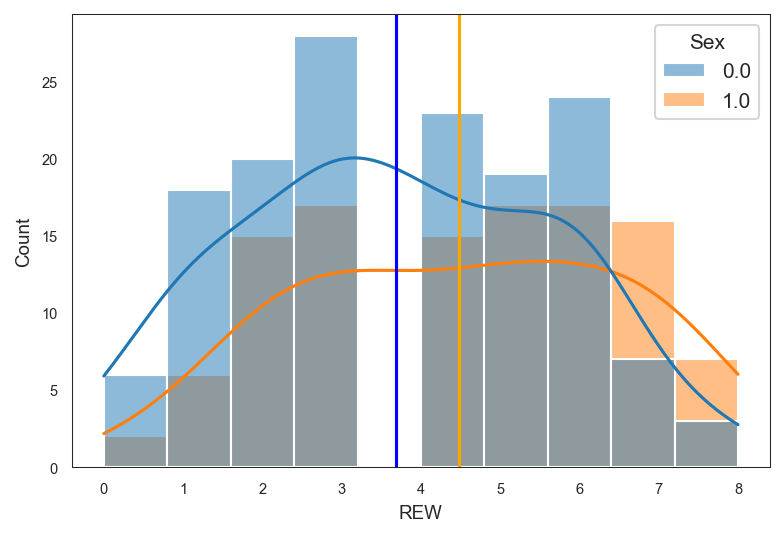

In [170]:
sns.histplot(df, x="REW", hue="Sex", kde=True)
plt.axvline(x=df[df['Sex'] == 0]['REW'].to_numpy().mean(), color='blue')
plt.axvline(x=df[df['Sex'] == 1]['REW'].to_numpy().mean(), color='orange')

In [171]:
# there is statistically significant difference in reward sensitivity between genders 
scipy.stats.ttest_ind(df[df['Sex'] == 0]['REW'].to_numpy(), df[df['Sex'] == 1]['REW'].to_numpy())

Ttest_indResult(statistic=-3.130021998534969, pvalue=0.001948906397099919)

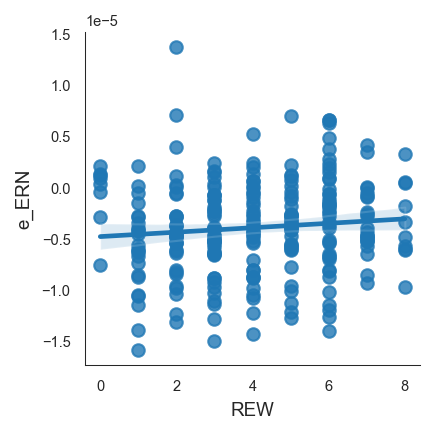

In [175]:
g = sns.FacetGrid(df)
g.map(sns.regplot, "REW", "e_ERN")

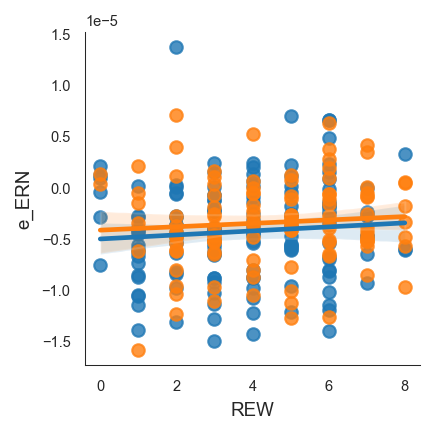

In [176]:
g = sns.FacetGrid(df, hue='Sex')
g.map(sns.regplot, "REW", "e_ERN")

In [177]:
model = smf.ols(formula='e_ERN ~ REW', data=df).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  e_ERN   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.542
Date:                Fri, 18 Aug 2023   Prob (F-statistic):              0.112
Time:                        17:27:40   Log-Likelihood:                 2834.0
No. Observations:                 260   AIC:                            -5664.
Df Residuals:                     258   BIC:                            -5657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.734e-06   6.13e-07     -7.727      0.000   -5.94e-06   -3.53e-06
REW          2.16e-07   1.35e-07      1.594      0.112   -5.08e-08    4.83e-07
==============================================================================
Omnibus:                        4.116   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                4.788
Skew:                           0.109   Prob(JB):                       0.0912
Kurtosis:                       3.628   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
model = smf.ols(formula='e_ERN ~ RRQ + AMB + STAND + WBSI + REW + HOARD + G_SE', data=df).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  e_ERN   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.601
Date:                Fri, 18 Aug 2023   Prob (F-statistic):             0.0131
Time:                        17:28:33   Log-Likelihood:                 2841.8
No. Observations:                 260   AIC:                            -5668.
Df Residuals:                     252   BIC:                            -5639.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.646e-06   2.02e-06     -0.815      0.416   -5.62e-06    2.33e-06
RRQ         -1.13e-06   4.02e-07     -2.808      0.005   -1.92e-06   -3.37e-07
AMB        -4.109e-07   3.97e-07     -1.036      0.301   -1.19e-06     3.7e-07
STAND       -3.18e-07   2.33e-07     -1.362      0.174   -7.78e-07    1.42e-07
WBSI        5.691e-07   4.14e-07      1.374      0.171   -2.46e-07    1.38e-06
REW         1.986e-07   1.36e-07      1.458      0.146   -6.96e-08    4.67e-07
HOARD       3.024e-07   2.99e-07      1.012      0.313   -2.86e-07    8.91e-07
G_SE        4.996e-07   3.83e-07      1.304      0.193   -2.55e-07    1.25e-06
==============================================================================
Omnibus:                        2.985   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                3.023
Skew:                           0.107   Prob(JB):                        0.221
Kurtosis:                       3.483   Cond. No.                         73.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
model = smf.ols(formula='e_ERN ~ REW + Sex', data=df).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  e_ERN   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.099
Date:                Fri, 18 Aug 2023   Prob (F-statistic):              0.125
Time:                        17:28:38   Log-Likelihood:                 2834.8
No. Observations:                 260   AIC:                            -5664.
Df Residuals:                     257   BIC:                            -5653.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.914e-06   6.28e-07     -7.828      0.000   -6.15e-06   -3.68e-06
REW         1.821e-07   1.38e-07      1.321      0.188   -8.93e-08    4.54e-07
Sex         7.339e-07   5.71e-07      1.284      0.200   -3.91e-07    1.86e-06
==============================================================================
Omnibus:                        4.966   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                6.104
Skew:                           0.131   Prob(JB):                       0.0473
Kurtosis:                       3.703   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
model = smf.ols(formula='e_ERN ~ RRQ + AMB + STAND + WBSI + REW + HOARD + G_SE + OB_PERF + Sex +  e_LT_F', data=df).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  e_ERN   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     12.28
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           2.91e-17
Time:                        17:28:58   Log-Likelihood:                 2884.8
No. Observations:                 260   AIC:                            -5748.
Df Residuals:                     249   BIC:                            -5708.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.199e-07   1.83e-06      0.394      0.694   -2.88e-06    4.32e-06
RRQ        -1.079e-06   3.45e-07     -3.130      0.002   -1.76e-06      -4e-07
AMB        -2.621e-07   3.42e-07     -0.766      0.445   -9.36e-07    4.12e-07
STAND      -1.799e-07   2.07e-07     -0.871      0.385   -5.87e-07    2.27e-07
WBSI        5.063e-07   3.57e-07      1.417      0.158   -1.98e-07    1.21e-06
REW         1.484e-07   1.18e-07      1.260      0.209   -8.36e-08     3.8e-07
HOARD       3.397e-07   2.63e-07      1.293      0.197   -1.78e-07    8.57e-07
G_SE        3.996e-07   3.35e-07      1.194      0.234    -2.6e-07    1.06e-06
OB_PERF     3.262e-08    2.2e-07      0.148      0.882   -4.01e-07    4.67e-07
Sex         1.515e-06   5.01e-07      3.021      0.003    5.27e-07     2.5e-06
e_LT_F     -8.481e-05   8.72e-06     -9.730      0.000      -0.000   -6.76e-05
==============================================================================
Omnibus:                        3.532   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                4.181
Skew:                           0.023   Prob(JB):                        0.124
Kurtosis:                       3.620   Cond. No.                         391.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- thought supression

Male = 1 || Female = 0

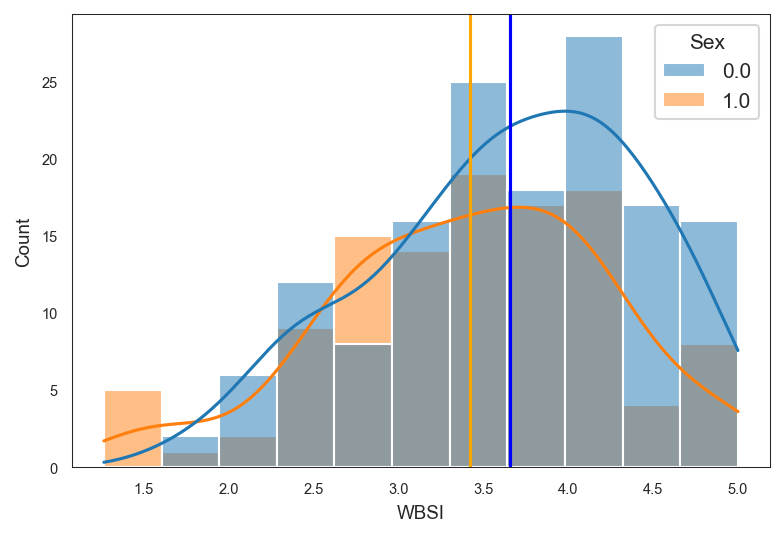

In [185]:
sns.histplot(df, x="WBSI", hue="Sex", kde=True)
plt.axvline(x=df[df['Sex'] == 0]['WBSI'].to_numpy().mean(), color='blue')
plt.axvline(x=df[df['Sex'] == 1]['WBSI'].to_numpy().mean(), color='orange')

In [186]:
# there is statistically significant difference in reward sensitivity between genders 
scipy.stats.ttest_ind(df[df['Sex'] == 0]['WBSI'].to_numpy(), df[df['Sex'] == 1]['WBSI'].to_numpy())

Ttest_indResult(statistic=2.397286225081129, pvalue=0.017228711476061982)

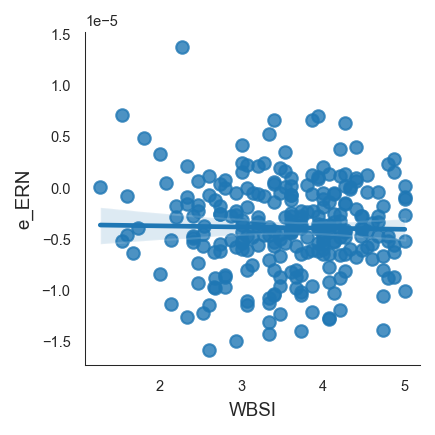

In [195]:
g = sns.FacetGrid(df)
g.map(sns.regplot, "WBSI", "e_ERN")

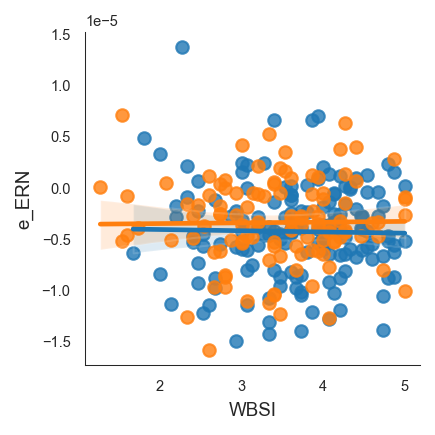

In [196]:
g = sns.FacetGrid(df, hue='Sex')
g.map(sns.regplot, "WBSI", "e_ERN")

In [197]:
model = smf.ols(formula='e_ERN ~ WBSI', data=df).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  e_ERN   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1045
Date:                Fri, 18 Aug 2023   Prob (F-statistic):              0.747
Time:                        17:32:04   Log-Likelihood:                 2832.8
No. Observations:                 260   AIC:                            -5662.
Df Residuals:                     258   BIC:                            -5654.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.465e-06   1.27e-06     -2.738      0.007   -5.96e-06   -9.73e-07
WBSI       -1.122e-07   3.47e-07     -0.323      0.747   -7.96e-07    5.71e-07
==============================================================================
Omnibus:                        3.259   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                3.589
Skew:                           0.073   Prob(JB):                        0.166
Kurtosis:                       3.557   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [213]:
model = smf.ols(formula='e_ERN ~ RRQ + AMB + STAND + WBSI + REW + HOARD + G_SE', data=df).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  e_ERN   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.601
Date:                Fri, 18 Aug 2023   Prob (F-statistic):             0.0131
Time:                        17:38:51   Log-Likelihood:                 2841.8
No. Observations:                 260   AIC:                            -5668.
Df Residuals:                     252   BIC:                            -5639.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.646e-06   2.02e-06     -0.815      0.416   -5.62e-06    2.33e-06
RRQ         -1.13e-06   4.02e-07     -2.808      0.005   -1.92e-06   -3.37e-07
AMB        -4.109e-07   3.97e-07     -1.036      0.301   -1.19e-06     3.7e-07
STAND       -3.18e-07   2.33e-07     -1.362      0.174   -7.78e-07    1.42e-07
WBSI        5.691e-07   4.14e-07      1.374      0.171   -2.46e-07    1.38e-06
REW         1.986e-07   1.36e-07      1.458      0.146   -6.96e-08    4.67e-07
HOARD       3.024e-07   2.99e-07      1.012      0.313   -2.86e-07    8.91e-07
G_SE        4.996e-07   3.83e-07      1.304      0.193   -2.55e-07    1.25e-06
==============================================================================
Omnibus:                        2.985   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                3.023
Skew:                           0.107   Prob(JB):                        0.221
Kurtosis:                       3.483   Cond. No.                         73.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
model = smf.ols(formula='e_ERN ~ WBSI + Sex', data=df).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  e_ERN   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.222
Date:                Fri, 18 Aug 2023   Prob (F-statistic):              0.296
Time:                        17:38:54   Log-Likelihood:                 2833.9
No. Observations:                 260   AIC:                            -5662.
Df Residuals:                     257   BIC:                            -5651.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.121e-06   1.33e-06     -3.091      0.002   -6.75e-06    -1.5e-06
WBSI       -3.316e-08    3.5e-07     -0.095      0.925   -7.22e-07    6.56e-07
Sex         8.703e-07   5.69e-07      1.530      0.127    -2.5e-07    1.99e-06
==============================================================================
Omnibus:                        4.556   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                5.537
Skew:                           0.112   Prob(JB):                       0.0628
Kurtosis:                       3.679   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
model = smf.ols(formula='e_ERN ~ RRQ + AMB + STAND + WBSI + REW + HOARD + G_SE + e_LT_F + Sex', data=df).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  e_ERN   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     13.69
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           7.66e-18
Time:                        17:38:57   Log-Likelihood:                 2884.8
No. Observations:                 260   AIC:                            -5750.
Df Residuals:                     250   BIC:                            -5714.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.941e-07   1.82e-06      0.382      0.703   -2.88e-06    4.27e-06
RRQ        -1.076e-06   3.43e-07     -3.133      0.002   -1.75e-06      -4e-07
AMB        -2.561e-07   3.39e-07     -0.755      0.451   -9.24e-07    4.12e-07
STAND       -1.72e-07   1.99e-07     -0.863      0.389   -5.64e-07     2.2e-07
WBSI        5.131e-07   3.54e-07      1.450      0.148   -1.84e-07    1.21e-06
REW         1.483e-07   1.18e-07      1.261      0.208   -8.33e-08     3.8e-07
HOARD        3.49e-07   2.55e-07      1.371      0.172   -1.52e-07     8.5e-07
G_SE        4.067e-07   3.31e-07      1.230      0.220   -2.44e-07    1.06e-06
e_LT_F      -8.48e-05    8.7e-06     -9.748      0.000      -0.000   -6.77e-05
Sex         1.512e-06      5e-07      3.023      0.003    5.27e-07     2.5e-06
==============================================================================
Omnibus:                        3.556   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                4.215
Skew:                           0.027   Prob(JB):                        0.122
Kurtosis:                       3.621   Cond. No.                         369.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- high standards

Male = 1 || Female = 0

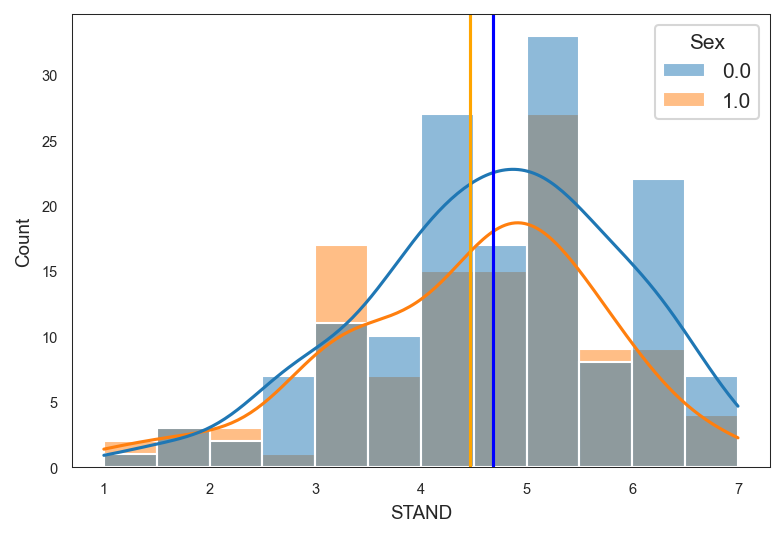

In [216]:
sns.histplot(df, x="STAND", hue="Sex", kde=True)
plt.axvline(x=df[df['Sex'] == 0]['STAND'].to_numpy().mean(), color='blue')
plt.axvline(x=df[df['Sex'] == 1]['STAND'].to_numpy().mean(), color='orange')

In [217]:
# there is statistically significant difference in reward sensitivity between genders 
scipy.stats.ttest_ind(df[df['Sex'] == 0]['STAND'].to_numpy(), df[df['Sex'] == 1]['STAND'].to_numpy())

Ttest_indResult(statistic=1.398228726403728, pvalue=0.16324517234747532)

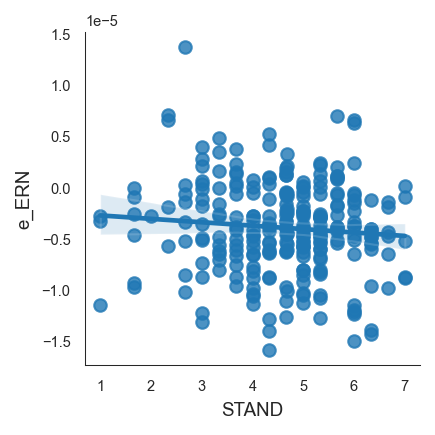

In [218]:
g = sns.FacetGrid(df)
g.map(sns.regplot, "STAND", "e_ERN")

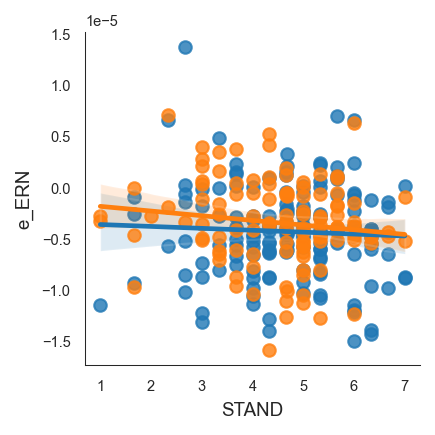

In [219]:
g = sns.FacetGrid(df, hue='Sex')
g.map(sns.regplot, "STAND", "e_ERN")

In [220]:
model = smf.ols(formula='e_ERN ~ STAND', data=df).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  e_ERN   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.197
Date:                Fri, 18 Aug 2023   Prob (F-statistic):              0.139
Time:                        17:40:30   Log-Likelihood:                 2833.8
No. Observations:                 260   AIC:                            -5664.
Df Residuals:                     258   BIC:                            -5657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.336e-06   1.07e-06     -2.187      0.030   -4.44e-06   -2.33e-07
STAND      -3.333e-07   2.25e-07     -1.482      0.139   -7.76e-07    1.09e-07
==============================================================================
Omnibus:                        2.425   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                2.414
Skew:                           0.052   Prob(JB):                        0.299
Kurtosis:                       3.460   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
model = smf.ols(formula='e_ERN ~ RRQ + AMB + STAND + WBSI + REW + HOARD + G_SE', data=df).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  e_ERN   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.601
Date:                Fri, 18 Aug 2023   Prob (F-statistic):             0.0131
Time:                        17:40:37   Log-Likelihood:                 2841.8
No. Observations:                 260   AIC:                            -5668.
Df Residuals:                     252   BIC:                            -5639.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.646e-06   2.02e-06     -0.815      0.416   -5.62e-06    2.33e-06
RRQ         -1.13e-06   4.02e-07     -2.808      0.005   -1.92e-06   -3.37e-07
AMB        -4.109e-07   3.97e-07     -1.036      0.301   -1.19e-06     3.7e-07
STAND       -3.18e-07   2.33e-07     -1.362      0.174   -7.78e-07    1.42e-07
WBSI        5.691e-07   4.14e-07      1.374      0.171   -2.46e-07    1.38e-06
REW         1.986e-07   1.36e-07      1.458      0.146   -6.96e-08    4.67e-07
HOARD       3.024e-07   2.99e-07      1.012      0.313   -2.86e-07    8.91e-07
G_SE        4.996e-07   3.83e-07      1.304      0.193   -2.55e-07    1.25e-06
==============================================================================
Omnibus:                        2.985   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                3.023
Skew:                           0.107   Prob(JB):                        0.221
Kurtosis:                       3.483   Cond. No.                         73.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
model = smf.ols(formula='e_ERN ~ STAND + Sex', data=df).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  e_ERN   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.144
Date:                Fri, 18 Aug 2023   Prob (F-statistic):              0.119
Time:                        17:40:58   Log-Likelihood:                 2834.9
No. Observations:                 260   AIC:                            -5664.
Df Residuals:                     257   BIC:                            -5653.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.815e-06   1.12e-06     -2.522      0.012   -5.01e-06   -6.17e-07
STAND      -3.052e-07   2.25e-07     -1.355      0.177   -7.49e-07    1.38e-07
Sex         8.122e-07   5.63e-07      1.443      0.150   -2.96e-07    1.92e-06
==============================================================================
Omnibus:                        3.421   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.181   Jarque-Bera (JB):                3.790
Skew:                           0.085   Prob(JB):                        0.150
Kurtosis:                       3.566   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [258]:
model = smf.ols(formula='e_ERN ~ RRQ + AMB + STAND + WBSI + REW + HOARD + G_SE + e_LT_F', data=df).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  e_ERN   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     13.81
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           1.35e-16
Time:                        18:49:34   Log-Likelihood:                 2880.2
No. Observations:                 260   AIC:                            -5742.
Df Residuals:                     251   BIC:                            -5710.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.037e-06   1.79e-06      1.138      0.256   -1.49e-06    5.56e-06
RRQ        -1.003e-06   3.48e-07     -2.882      0.004   -1.69e-06   -3.18e-07
AMB        -3.589e-07   3.43e-07     -1.047      0.296   -1.03e-06    3.16e-07
STAND      -1.977e-07   2.02e-07     -0.977      0.329   -5.96e-07    2.01e-07
WBSI        4.287e-07   3.58e-07      1.196      0.233   -2.77e-07    1.13e-06
REW         2.089e-07   1.18e-07      1.774      0.077    -2.3e-08    4.41e-07
HOARD       3.179e-07   2.58e-07      1.230      0.220   -1.91e-07    8.27e-07
G_SE        2.573e-07   3.32e-07      0.775      0.439   -3.97e-07    9.11e-07
e_LT_F     -8.132e-05   8.76e-06     -9.282      0.000   -9.86e-05   -6.41e-05
==============================================================================
Omnibus:                        2.979   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                3.296
Skew:                          -0.010   Prob(JB):                        0.192
Kurtosis:                       3.551   Cond. No.                         366.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

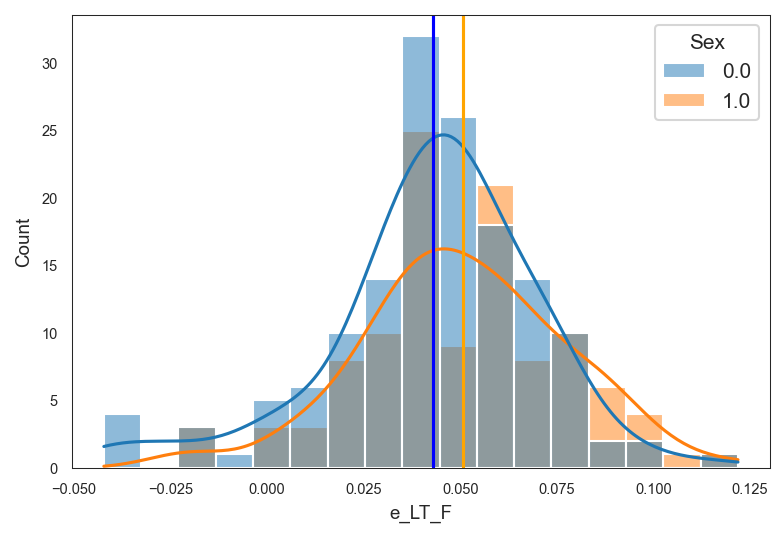

In [236]:
sns.histplot(df, x="e_LT_F", hue="Sex", kde=True)
plt.axvline(x=df[df['Sex'] == 0]['e_LT_F'].to_numpy().mean(), color='blue')
plt.axvline(x=df[df['Sex'] == 1]['e_LT_F'].to_numpy().mean(), color='orange')

In [226]:
model = smf.ols(formula='Sex ~ e_LT_F', data=df).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sex   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.260
Date:                Fri, 18 Aug 2023   Prob (F-statistic):             0.0226
Time:                        17:42:24   Log-Likelihood:                -183.57
No. Observations:                 260   AIC:                             371.1
Df Residuals:                     258   BIC:                             378.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3115      0.060      5.166      0.000       0.193       0.430
e_LT_F         2.5810      1.125      2.294      0.023       0.365       4.797
==============================================================================
Omnibus:                     1444.442   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.256
Skew:                           0.271   Prob(JB):                     1.81e-09
Kurtosis:                       1.150   Cond. No.                         37.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""